Google Colab Notebook link:

https://colab.research.google.com/drive/1JLuG1va_LTAcnKYdAXOcb1l2ZPzNI3La?authuser=1#scrollTo=z6XB3h8BM3lF

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(10 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

Provide python code and analysis results first. Use them to support your answers to the two questions above.

FYI the column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [35]:
### import packages


import pandas as pd

In [36]:
### load dataset


df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA810/Data/Auto.csv')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

***Q1.1 Should you drop any variable from regression analysis and why? (5 points)***

Whether a variable should be dropped for regression analysis should be decided based on whether its contributing to the prediction.

For this dataset, the **"name"** variable should be dropped since vehicle name is ususlly not helpful to predicting vehicle's mile per gallon in a regression analysis.

***Q1.2 Which variables should be treated as numeric and which as categorical? Explain why. (5 points)***

A variable should be treated numerical if it has numerical values plus the fact that meaningful statistical analysis could be conducted upon it.

In the meanwhile, a variable should be treated categorical if it has values of different categories.

Thus the variables from this dataset that should be treated as numerical and categorical are listed below:

Numerical variable list:
1.   mpg
2.   cylinders
3.   displacement
4.   horsepower
5.   weight
6.   acceleration

Categorical variable list:
1.   year
2.   origin
3.   name


## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

In [37]:
### import packages


import seaborn as sns

In [38]:
### process data


## drop name variable
df1=df.drop(columns=['name'], axis=1)

## separate numerical variables
df_numerical=df1[['mpg','cylinders','displacement','horsepower','weight','acceleration']]

### *Q2.1 Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)*

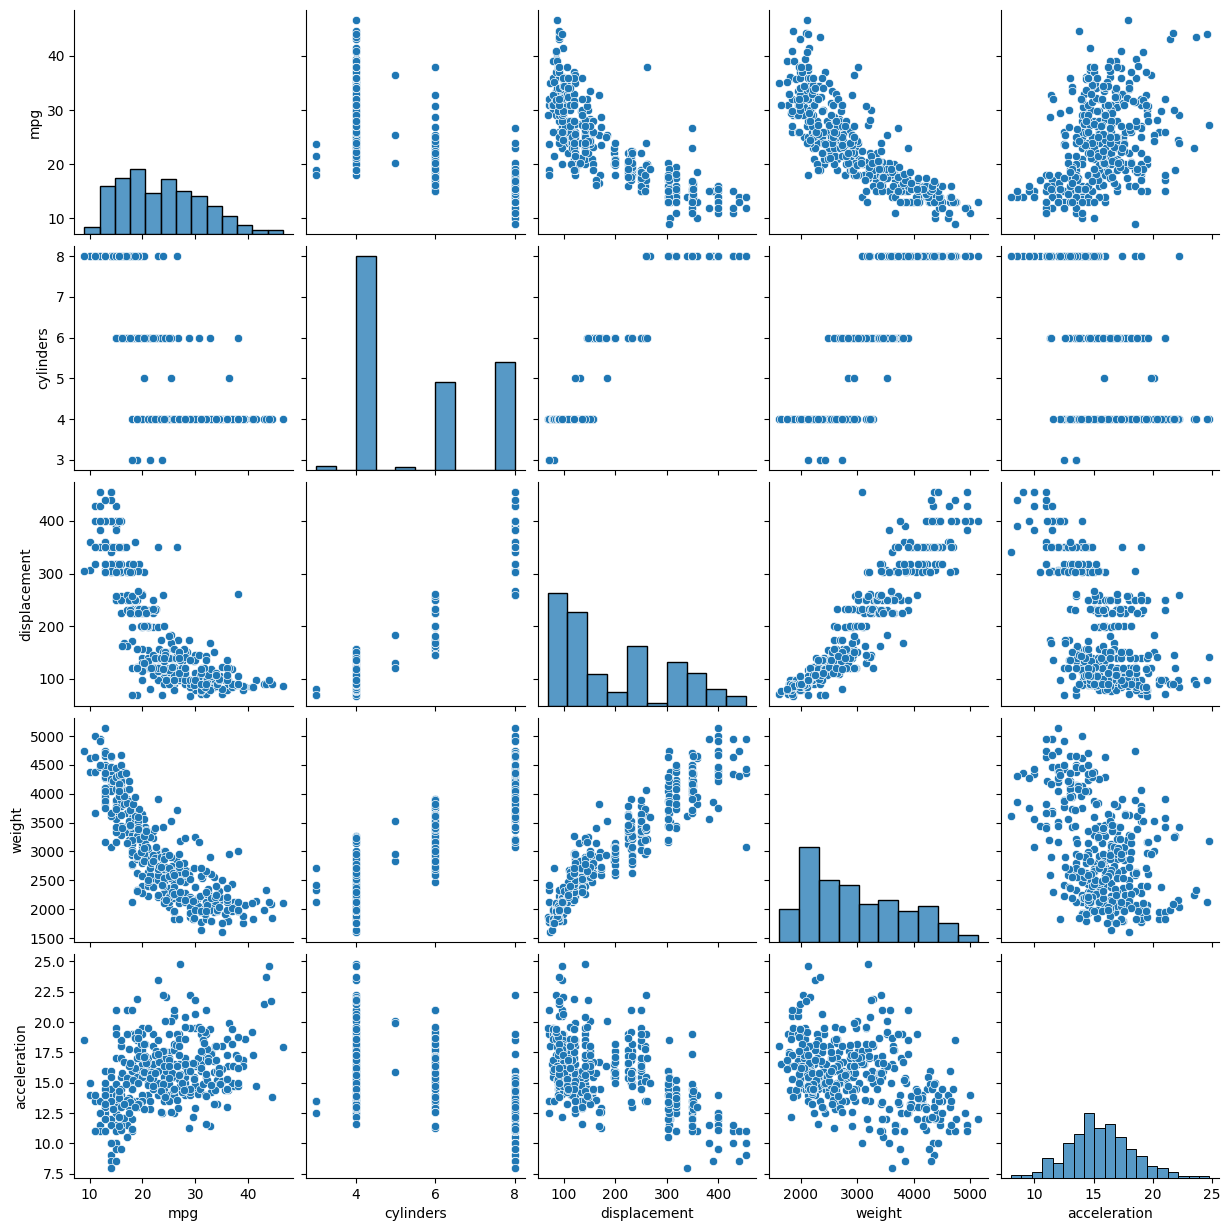

In [39]:
### draw graphs


## plot pairplot with sns
sns.pairplot(data=df_numerical)

### *Q2.2 Discuss two interesting relationships that you notice. (10 points)*

What came to my sight are two relationships.

The first one being the negative relationship between vehical weight and mpg, meaning that as the weight of cars increases, the mpg of cars decreases. This matches with common sense as more mass requires more energy to travel the same distance.

The second one being the negative relationship between engine displacement and mpg, meaning that as the engine displacement increases, the mpg of cars decreases.

These findings are useful as they could proveide insights for further analysis.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (10+10=**20 points total**)

In [40]:
### import packages


import matplotlib.pyplot as plt

<ipython-input-41-90d0db1f4373>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df_numerical.corr()


                   mpg  cylinders  displacement    weight  acceleration
mpg           1.000000  -0.776260     -0.804443 -0.831739      0.422297
cylinders    -0.776260   1.000000      0.950920  0.897017     -0.504061
displacement -0.804443   0.950920      1.000000  0.933104     -0.544162
weight       -0.831739   0.897017      0.933104  1.000000     -0.419502
acceleration  0.422297  -0.504061     -0.544162 -0.419502      1.000000


Text(50.72222222222221, 0.5, 'Variables')

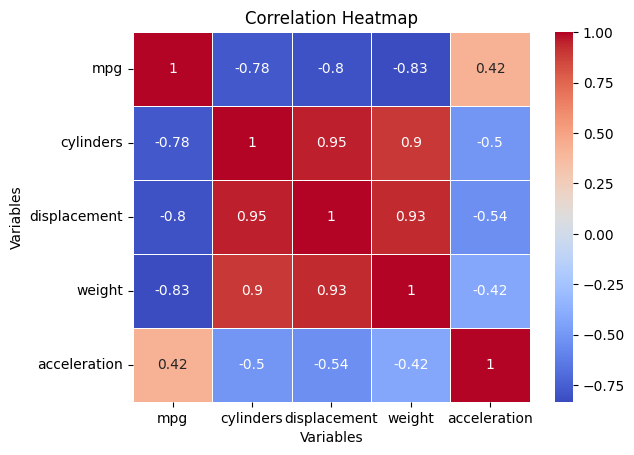

In [41]:
### correlation matrix


## compute correlation matrix
correlation_matrix=df_numerical.corr()
print(correlation_matrix)

## draw correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

The matrix and the heatmap could help us see correlation between numeric variables more easily. One of the most interesting correlation showed by them, to me, would be that between **displacement** and **cylinders**.

It is the highest correlation in the whole matrix at 0.95, which is pretty easy to understand since the definition of engine displacement of a car, according to google, is *"the total volume of an engine's cylinders"*. As the number of cylinders in a car increases, it is reasonable for the total volume of cylinders increases, thus explain the high positive correlation.


## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [42]:
### import packages


import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
### create and fit model


## prepare data

# handle datatype of horsepower column
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce') # handling non-numeric values by replacing them with NaN
df1.dropna(inplace=True) # dropping observations with NaN just forcefully created
df1['horsepower'] = df1['horsepower'].astype('float64') # change dtype of column horsepower into float64


## create and fit model
model1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin)', df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     115.2
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          8.26e-143
Time:                        02:14:32   Log-Likelihood:                -983.13
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     372   BIC:                             2086.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.0199      2.142     17.

### *Q4.1 Interpret the significant effects. (5 points)*

For an intercept or a predictor to be significant, it must has its p-value lower than the alpha, which is 0.05 by default.

Above is the OLS regression result table. According to this rule, here are the list of all significant effects.

1. Intercept
2. year (from 1976 to 1982)
3. origin
4. displacement
5. weight

The **intercept** tells that an 1970 American car with every numerical variable being 0, has around 37.2 mpg.

The **year** tells that being the car of that year would change its mpg of that amount.

The **origin** tells that a European and a Japanese car would both have around 2.5 mpg than an American car.

The **displacement** tells that for each inch of increase in engine displacement, the car's mpg increase by 0.0173.

The **weight** tells that for each pound of increase in car's weight, the car's mpg decrease by 0.0061.



### *Q4.2 Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)*

The variables that are not significant, according to the rule mentioned above, are listed as below:

1. year (from 1971 to 1975)
2. cylinders
3. acceleration

The potention reason for cylinder being not significant could be that it's significant for some numbers of cylinders while it's not for others, just like the case of year column. This could be proven by treating the cylinders column as category, just like what we did to the year and origin columns.

In [13]:
model2 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)', df1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.79e-139
Time:                        00:57:24   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.

### *Q4.3 Discuss the difference in results when you treat year as a categorical vs a numeric variable. (5 points)*

As is shown above, the year variable becomes significant when treated as numerical, which means that each year's new car would have a 0.777 higher mpg than the car last year, according to the data from the result table.

This could save time and effort for further analysis.



## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [32]:
# origin & cylinder
model_origin_cylinder = smf.ols('mpg ~ C(origin):cylinders + cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin)', data=df1).fit()

# origin & displacement
model_origin_displacement = smf.ols('mpg ~ C(origin):displacement + cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin)', data=df1).fit()

# origin & weight
model_origin_weight = smf.ols('mpg ~ C(origin):weight + cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin)', data=df1).fit()

print(model_origin_cylinder.summary())
print(model_origin_displacement.summary())
print(model_origin_weight.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.41e-141
Time:                        02:04:09   Log-Likelihood:                -982.03
No. Observations:                 392   AIC:                             2008.
Df Residuals:                     370   BIC:                             2095.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

According to the results table above, the interaction between origin and cylinders is not significant at alpha = 0.05, while the other two (the interaction between origin and displacement and that between origin and weight) are both significant at alpha = 0.05.

The significance of the interaction between origin and displacement shows that for a European car specifically, an one inch increase in engine displacement leads to an extra 0.0547 decrease in the car's mpg, while that number is 0.0416 for a Japanese car.

The significance of the interaction between origin and weight shows that for a European car specifiaclly, an one pound increase in car weight leads to an extra 0.0024 decrease in car's mpg, while that number is 0.0057 for a Japanese car.

## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

In [20]:
### import packages


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
### prepare data


train_set, test_set = train_test_split(df1, test_size=0.2, random_state=69)

In [27]:
### create model and fit data


train_model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin)', data=train_set).fit()
train_pred = train_model.predict(train_set)
test_pred = train_model.predict(test_set)

in_r2 = r2_score(train_set['mpg'], train_pred)
out_r2 = r2_score(test_set['mpg'], test_pred)

print('The in-sample R-squared is {}'.format(in_r2))
print('The out-of-sample R-squared is {}'.format(out_r2))

The in-sample R-squared is 0.85943036211762
The out-of-sample R-squared is 0.8176620916893816


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
2. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here

Then I wrote the code that is submitted in the assignment.

3. I did not discuss with anyone or get any help from any generative AI tool.

I discussed with Min Xu about data leakage problem in question 6, along with some syntax error.

I gained help from ChatGPT in R-square calculation and creating correlation heatmap.